<a href="https://colab.research.google.com/github/CataQM/CataQM/blob/main/Proyecto_programacion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto de optimización con programación lineal
## Autora: Catalina Quincosis Martínez
## Fecha: 18/03/2022
### Última entrega del curso de optimización (2021-1) de la Universidad del Valle a cargo del profesor Miguel Ángel Vargas Valencia.

# Problema de optimización
Una red de refugios animales del municipio de Cali (Valle), Colombia, cuenta con 1.238 animales rescatados con un número fuctuante de perros y gatos. Esta red busca más recursos para el mantenimiento de los animales que no pueden ser adoptados, además de esterilizar y vacunar a aquellos que pueden llenar de amor a un hogar. Con este fin, hacen un estudio con las personas interesadas en adoptar algunos de los peludos para que sean compatibles con la forma de vida de la persona y las necesidades de la futuras mascota. En caso de que la persona no cuente con lo necesario o simplemente quiere ayudar apadrinando a un animalito, se le asiganrá alguno de los peluditos viejos que se ajuste a su presupuesto.

## Aclaro que la compatibilidad está fundamentada en algunos criterios de responsabilidad adoptiva y es solo una sugerencia para las personas interesadas en los peluditos. La decisión final será criterio del futuro dueño o patrocinador.

In [32]:
#@title Importamos paquetes
!pip install pulp
import pulp 

In [33]:

import pandas as pd
import seaborn as sns
import numpy as np
import itertools
from scipy import stats
import random

sns.set_theme(style="darkgrid")

# Variables
## Identificación de la persona $$ ID. $$
## Género (femenino, masculino) $$F, M$$
## Estrato socioeconómico $$1, 2, 3, 4, 5, 6$$
## Área de la propiedad ($m^2)$
## Tipo de mascota $$Felino$$ $$Canino$$
## Subvariable de raza (pequeña o grande)$$p, G$$
## Situación del peludo (adoptable, no adoptable) $$ A, NA$$



In [34]:
# Datos aleatorias de identificación de las personas interesadas en adoptar o apadrinar.
IDpersonas = random.sample(range(70000000, 1000000000), 356)

#Género de la persona.
genero = ['F', 'M'] 

#Estrato socioeconómico.
estrato = list(range(1, 6))

#Área de la propiedad donde viven las personas interesada.
areavivienda = list(range(50, 280, 10))


# Tabla de datos de los interesados 

In [35]:

asig=list(zip(IDpersonas,356*[genero],356*[estrato],356*[areavivienda]))

In [36]:
Datos = []
for dat in asig:
    a = [dat[1],dat[2],dat[3]]
    combi=list(itertools.product(*a))
    for c in combi:
        Datos.append([dat[0],c[0],c[1],c[2]])


In [37]:
random.shuffle(Datos)
BD=random.sample(Datos,356)

In [38]:
df=pd.DataFrame(BD, columns=['ID','Género', 'Estrato', 'Área de vivienda (m^2)'])
df[df.duplicated()==False]

,ID,Género,Estrato,Área de vivienda (m^2)
0,718845811,F,1,260
1,556219737,M,4,220
2,138077738,M,3,70
3,971840375,F,2,230
4,221003131,F,1,140
...,...,...,...,...
351,894944661,F,1,50
352,567751543,M,2,110
353,118193668,F,5,170
354,222036686,M,3,270


In [39]:
#@title Para enlistar a los posibles dueños
#Debo separar los posibles dueños de los padrinos.
dfD = df.loc[(df['Estrato'] >= 2) & (df['Área de vivienda (m^2)'] >= 80)]
dfK = df.loc[(df['Estrato'] >= 3) & (df['Área de vivienda (m^2)'] <= 80)]
D = df.loc[(df['Estrato'] >= 2) & (df['Área de vivienda (m^2)'] >= 80)].values.tolist()
K = df.loc[(df['Estrato'] >= 3) & (df['Área de vivienda (m^2)'] <= 80)].values.tolist()
#Variable de identificaciones de las personas interesadas.
Identificacion_Duenos = df['ID'] 

# Condición de datos aleatorios
## Para este problema se generaron datos aleatorios para las personas y las mascotas, por lo tanto, cada que se ejecuta el programa obtendremos cantidades distintas de peludos aptos para adopción y no aptos, al igual que la cantidad de personas con posibilidad de ser dueños y las personas que pueden ser padrinos. 

# Tabla de información de los peludos 
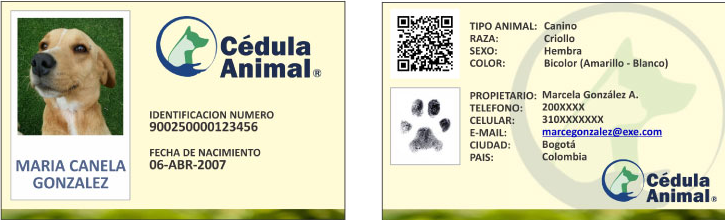

In [40]:
#No. Cédula animal
Cedulanimal = random.sample(range(800000000000000, 900000000000000), 1238)

#Tipo de mascota.
tipomascota = ['Felino', 'Canino']

#Clasificación de raza canina.
razacanino = ['G', 'p']

#Situación del peludo.
situapeludo = ['A', 'NA']

In [41]:
asigP = list(zip(Cedulanimal,1238*[tipomascota],652*[razacanino],1238*[situapeludo]))

DatosP = []
for data in asigP:
    aP = [data[1],data[2],data[3]]
    combin=list(itertools.product(*aP))
    for j in combin:
        DatosP.append([data[0],j[0],j[1],j[2]])

In [42]:
random.shuffle(DatosP)
BDP = random.sample(DatosP,1238)

In [43]:
dfP = pd.DataFrame(BDP, columns=['ID_animal','Tipo', 'Tamaño', 'Situación'])
dfP[dfP.duplicated()==False]

,ID_animal,Tipo,Tamaño,Situación
0,821058586263490,Felino,p,A
1,835010874160964,Felino,G,A
2,892582180739943,Canino,p,A
3,827252376570130,Felino,p,A
4,836438817113409,Felino,p,A
...,...,...,...,...
1233,841839213560408,Felino,p,A
1234,870630411098041,Felino,G,A
1235,864459326517707,Felino,G,A
1236,844230221729843,Canino,G,NA


In [44]:
#@title para enlistar a las posibles mascotas
#M es el conjunto de los peludos aptos para adopción.
M = dfP.loc[dfP['Situación'] == 'A'].values.tolist()
#M = list(dfP.loc[dfP['Situación'] == 'A'])
#M=[]
#if dfP.loc[dfP['Situación'] == 'A']is True:
  #M.append(dfP.loc[dfP['Situación'] == 'A'])
#V es el conjunto de los peludos no aptos para adopción.
V = dfP.loc[dfP['Situación'] == 'NA'].values.tolist()

#Variable de identificaión de los peluditos
Identificacion_animal = dfP['ID_animal']




## Aclaración sobre la columna **Tamaño**
### Para el caso de los felinos, si en la columna tiene una **p** quiere decir que se trata de un cachorro, mientras **G** se refiere a un gato adulto.

## En el caso de los perros **p** quiere decir que es un perro de raza pequeña y **G** se refiere a un perro de raza grande.

# Conjuntos de Adopción y Apadrinaje

$M$ Conjunto de futuras mascotas, es decir, peludos A.

$D$ Conjunto de futuros dueños.

$$Adopción =\{ (m,d) : m \in M , d\in D \}$$

$V$ Conjunto de peludos viejitos, es decir, peludos NA.



In [45]:
adopcion = [(m,d) for m in M for d in D]

In [46]:
#apadrinaje = [(v,k) for v in V for k in K]

## Variables:

$x_{(m,d)}$:= Cantidad de mascotas que van del refugio $m \in M$ a sus futuros dueños $d \in D$.

In [58]:
variable1 = pulp.LpVariable.dicts("X",Identificacion_Duenos,0)



In [69]:
variable2 = pulp.LpVariable.dicts("C",Identificacion_animal,0)

In [70]:
prob = pulp.LpProblem("Problema_de_adopcion", pulp.LpMaximize)

In [71]:
prob

Problema_de_adopcion:
MAXIMIZE
None
VARIABLES

# Objetivo
## Conseguir la mayor cantidad de compatibilidades entre posibles dueños con los peludos aptos para la adopción.


# Función objetivo
Maximizar
$$\sum_{m \in M} \sum_{d \in D} c_{md}x_{md} $$

In [74]:
prob += pulp.lpSum([variable1[d][m]*variable2[d][m] for (m, d) in adopcion]), 'compatibilidad entre persona y mascota'

TypeError: ignored

# Inviabilidad de la función

Se presenta el problema de las mascotas, sin embargo, la función objetivo debería tener una combinatoria, ya que, una de las cosas que se necesita son las parejas posibles de dueños con mascotas compatibles.

Por otra parte, se debe evaluar si la persona puede tener más de una mascota y el problema se complica.

## Restricciones de adopción

Como la cantidad de peluditos varía, no podemos tener una cifra exacta, sin enbargo, podemos asegurar que la cantidad de perros y gatos que no son aptos para la adopción es menor que los animales no aptos

Las mascotas que salen del refugio deben ser menores o iguales a la cantidad de peluditos A (aptos para adopción)
$$\sum_{d} c_{md} \leq  len(M)_{m} \ \ \ \forall m \in M$$



In [ ]:
for m in M:
    prob += pulp.lpSum([variable2[m] for m in M]) <= len(M), "Constraint_of_Supply: Warehouse %s"%w

In [ ]:
prob.solve()
print("El estaus final de la solución es:", pulp.LpStatus[prob.status])

# Restricciones de demanda


1.   Las peronas que deseen adoptar un Canino grande, deberán vivir en una propiedad de  $m^2$.
2. En la base de datos del estudio hay 356 personas registradas.  




